In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

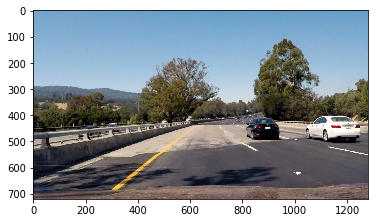

In [2]:
# original image 
img = mpimg.imread('./test_images/test4.jpg')
plt.imshow(img)

In [17]:
def gray_select(img, thresh=(0, 255), debug=False):
    """
        Apply threshold on image with RGB colorspace.
        
        Parameters
        ----------
        img          : RGB image.
        thresh       : the intensity value range to keep 
        debug        : If debug == True, then display result.
                       
        return
        ----------
        binary_output : binary image
    """    
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    binary_output = np.zeros_like(gray)
    binary_output[(gray > thresh[0]) & (gray <= thresh[1])] = 1
    
    if debug == True:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
        axes[0].set_title('grayscale')
        axes[0].set_axis_off()
        axes[0].imshow(gray, cmap='gray')
        axes[1].set_title('grayscale with range select')
        axes[1].set_axis_off()
        axes[1].imshow(binary_output, cmap='gray')
        plt.show()
        
    return binary_output

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

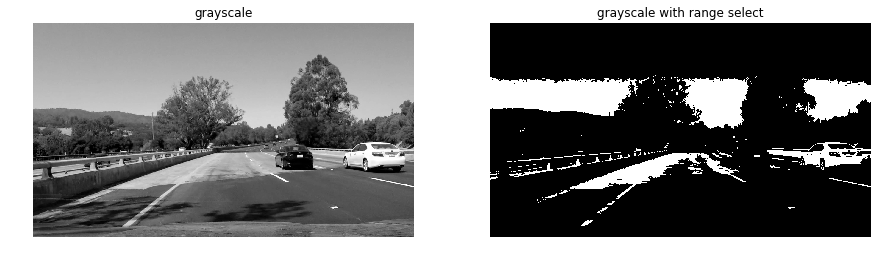

In [18]:
# seriously effected by shadow.
thresh = (180, 255)
gray_select(img, thresh=thresh, debug=True)

In [19]:
def rgb_select(img, channel='R', thresh=(0, 255), debug=False):
    """
        Apply threshold on image with RGB colorspace.
        
        Parameters
        ----------
        img          : RGB image.
        channel      : Select channel to apply threshold on. If channel is 'RGB', then don't apply threshold.
        thresh       : the range is only useful when channel is not 'RGB' or 'RGB'.
        debug        : If debug equals True then display result and return None, 
                       
        return
        ----------
        None          : if channel == 'RGB', 'rgb'.
        binary_output : binary image if channel == 'R', 'G', 'B', 'r', 'g', 'b'
    """

    rgb = img.copy()
    channel = channel.upper()
    
    if channel == 'R':
        channel_img = rgb[:, :, 0]
    elif channel == 'G':
        channel_img = rgb[:, :, 1]
    elif channel == 'B':
        channel_img = rgb[:, :, 2]
    elif channel == 'RGB' and debug == True:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
        R = rgb[:,:,0]
        G = rgb[:,:,1]
        B = rgb[:,:,2]

        axes[0].set_title('R')
        axes[0].set_axis_off()
        axes[1].set_title('B')
        axes[1].set_axis_off()
        axes[2].set_title('G')
        axes[2].set_axis_off()
        axes[0].imshow(R, cmap='gray')
        axes[1].imshow(G, cmap='gray')
        axes[2].imshow(B, cmap='gray')
        plt.show()
        return None
    else:
        return None
    
    binary_output = np.zeros_like(channel_img)
    binary_output[(channel_img > thresh[0]) & (channel_img <= thresh[1])] = 1
    
    if debug == True:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
        
        axes[0].set_title('original image')
        axes[0].set_axis_off()
        axes[0].imshow(img)        
        
        axes[1].set_title(channel + ' original')
        axes[1].set_axis_off()
        axes[1].imshow(channel_img, cmap='gray')

        axes[2].set_title(channel + ' with_range_select')
        axes[2].set_axis_off()
        axes[2].imshow(binary_output, cmap='gray')
        plt.show()
        
    return binary_output

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

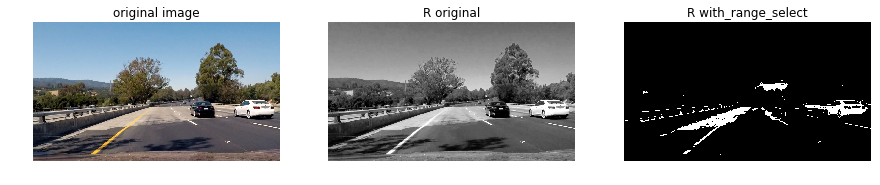

In [20]:
# R channel does a good job.
rgb_select(img, channel='R', thresh = (200, 255), debug=True)

In [21]:
def hls_select(img, channel='S', thresh=(0, 255), debug=False):
    """
        Apply threshold on image with hls colorspace.
        
        Parameters
        ----------
        img          : RGB image.
        channel      : Select channel to apply threshold on. If channel is 'HLS' then don't apply threshold.
        thresh       : the range is only useful when channel is not 'HLS' or 'hls'.
        debug        : If debug equals True then display result. 
                       
        return
        ----------
        None          : if channel == 'HLS', 'hls'
        binary_output : binary image if channel == 'H', 'L', 'S', 'h', 'l', 's'
    """

    
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    channel = channel.upper()
    
    if channel == 'H':
        channel_img = hls[:, :, 0]
    elif channel == 'L':
        channel_img = hls[:, :, 1]
    elif channel == 'S':
        channel_img = hls[:, :, 2]
    elif channel == 'HLS' and debug == True:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
        H = hls[:,:,0]
        L = hls[:,:,1]
        S = hls[:,:,2]

        axes[0].set_title('H')
        axes[0].set_axis_off()
        axes[1].set_title('L')
        axes[1].set_axis_off()
        axes[2].set_title('S')
        axes[2].set_axis_off()
        axes[0].imshow(H, cmap='gray')
        axes[1].imshow(L, cmap='gray')
        axes[2].imshow(S, cmap='gray')
        plt.show()
        return None
    else:
        return None
    
    binary_output = np.zeros_like(channel_img)
    binary_output[(channel_img > thresh[0]) & (channel_img <= thresh[1])] = 1
    
    if debug == True:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
        
        axes[0].set_title('original image')
        axes[0].set_axis_off()
        axes[0].imshow(img)        
        
        axes[1].set_title(channel + ' original')
        axes[1].set_axis_off()
        axes[1].imshow(channel_img, cmap='gray')

        axes[2].set_title(channel + ' with_range_select')
        axes[2].set_axis_off()
        axes[2].imshow(binary_output, cmap='gray')
        plt.show()
    
    return binary_output

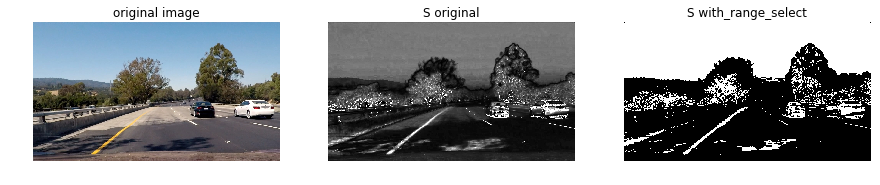

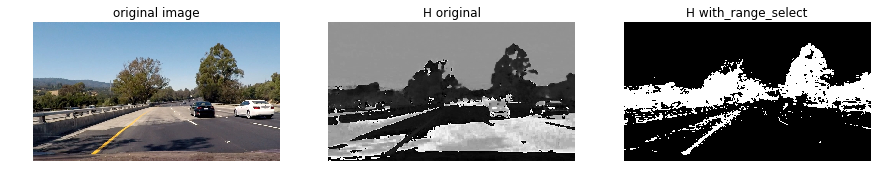

In [22]:
hls_select(img, channel='S', thresh=(90, 255), debug=True)
hls_select(img, channel='H', thresh=(15, 100), debug=True)
hls_select(img, channel='HLS', thresh=(15, 100), debug=False)

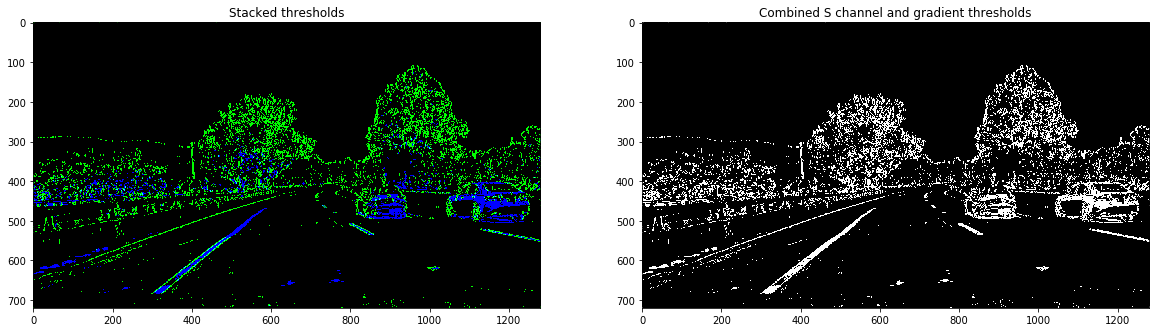

In [29]:
# Convert to HLS color space and separate the S channel
# Note: img is the undistorted image
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]

# Grayscale image
# NOTE: we already saw that standard grayscaling lost color information for the lane lines
# Explore gradients in other colors spaces / color channels to see what might work better
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Sobel x
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx / np.max(abs_sobelx))

# Threshold x gradient
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

# Threshold color channel
s_thresh_min = 170
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))

# Combine the two binary thresholds
combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(color_binary.astype('float32'))
plt.imsave("test1.jpg", color_binary)

ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')